In [1]:
import gym
import shinrl as srl
import seaborn as sns
import numpy as np
from shinrl import DiscretePiSolver
import matplotlib.pyplot as plt

# ShinEnv

## Policy Iteration (Dynamic Programming)

In [2]:
env = gym.make("ShinPendulum-v0")
env.reset()

config = DiscretePiSolver.DefaultConfig(
    approx="tabular",
    explore="oracle",
    eval_interval=1,
    add_interval=1,
    steps_per_epoch=20,
    verbose=False,
)
mixins = DiscretePiSolver.make_mixins(env, config)
solver = DiscretePiSolver.factory(env, config, mixins)

In [3]:
solver.run()

Epoch 0: 100%|██████████████████████| 20/20 [00:00<00:00, 65.86it/s]


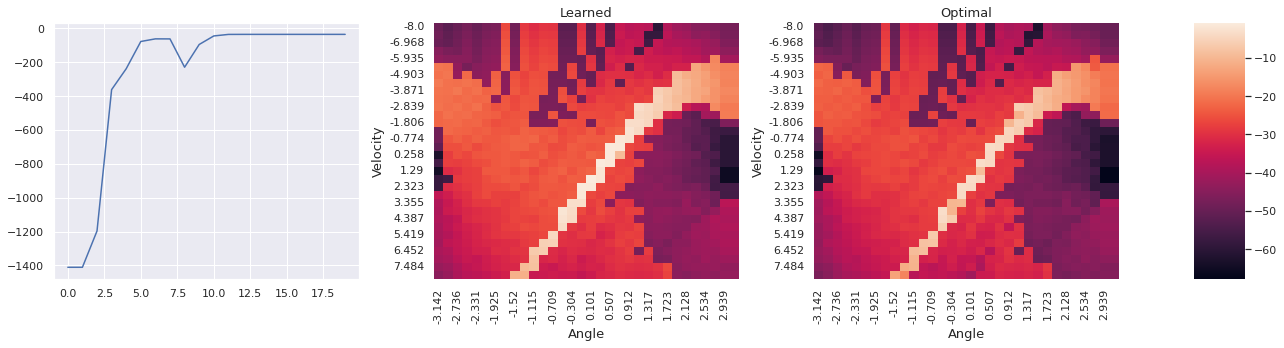

In [4]:
sns.set(font_scale=1.0)
grid_kws = {"width_ratios": (0.3, 0.3, 0.3, 0.05)}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), gridspec_kw=grid_kws)

axes[0].plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])

learned = solver.data["Q"][:, 0]
optimal = env.calc_optimal_q()[:, 0]
_max, _min = np.maximum(learned, optimal).max(), np.minimum(learned, optimal).min()
env.plot_S(learned, ax=axes[1], cbar_ax=axes[3], title="Learned", fontsize=13, vmin=_min, vmax=_max)
env.plot_S(optimal, ax=axes[2], cbar_ax=axes[3], title="Optimal", fontsize=13, vmin=_min, vmax=_max)
plt.tight_layout()

## Discrete SAC

In [10]:
env = gym.make("ShinPendulum-v0")
env.reset()

config = DiscretePiSolver.DefaultConfig(
    approx="nn",
    explore="eps_greedy",
    eval_interval=100,
    add_interval=1,
    steps_per_epoch=30000,
    eps_end=0.5,
    eps_decay=3000,
    target_update_interval=100,
    er_coef=0.1,
    verbose=False,
)
mixins = DiscretePiSolver.make_mixins(env, config)
solver = DiscretePiSolver.factory(env, config, mixins)

In [11]:
solver.run()

Epoch 0: 100%|███████████████| 30000/30000 [00:45<00:00, 659.34it/s]


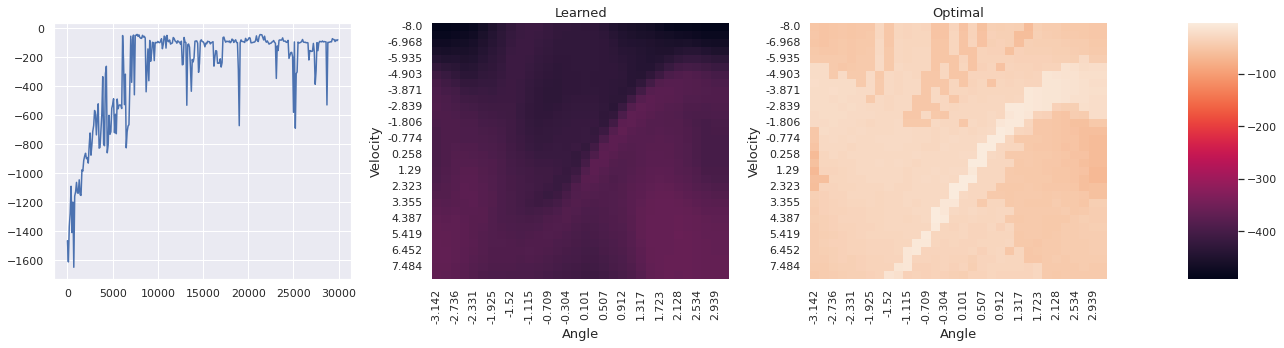

In [12]:
sns.set(font_scale=1.0)
grid_kws = {"width_ratios": (0.3, 0.3, 0.3, 0.05)}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), gridspec_kw=grid_kws)

axes[0].plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])

learned = solver.data["Q"][:, 0]
optimal = env.calc_optimal_q()[:, 0]
_max, _min = np.maximum(learned, optimal).max(), np.minimum(learned, optimal).min()
env.plot_S(learned, ax=axes[1], cbar_ax=axes[3], title="Learned", fontsize=13, vmin=_min, vmax=_max)
env.plot_S(optimal, ax=axes[2], cbar_ax=axes[3], title="Optimal", fontsize=13, vmin=_min, vmax=_max)
plt.tight_layout()

# MinAtar

You need to install MinAtar environment.
See https://github.com/kenjyoung/MinAtar .

In [15]:
import shinrl

env = shinrl.make_minatar("breakout")
env.reset()

config = srl.DiscretePiSolver.DefaultConfig(
    add_interval=10,
    eval_interval=1000,
    steps_per_epoch=100000,
    approx="nn",
    explore="eps_greedy",
    exploit="greedy",
    num_samples=4,
    eps_end=0.1,
    eps_decay=10**5,
    eps_warmup=5000,
    q_lr=2.5*1e-4,
    pol_lr=1*1e-4,
    batch_size=32,
    buffer_size=1e5,
    optimizer="rmsprop",
    target_update_interval=1000,
    q_loss_fn="huber_loss",
    er_coef=0.1,
    verbose=False,
)
mixins = DiscretePiSolver.make_mixins(env, config)
solver = DiscretePiSolver.factory(env, config, mixins)

In [16]:
solver.run()

Epoch 0: 100%|█████████████| 100000/100000 [04:05<00:00, 407.47it/s]


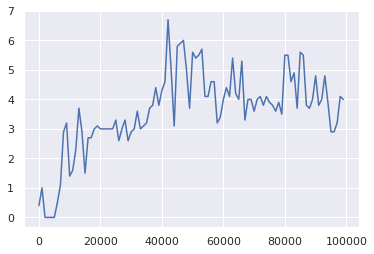

In [17]:
sns.set(font_scale=1.0)
plt.plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])